In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 503663 bytes


In [10]:
import pandas as pd
import io
messages = pd.read_csv(io.StringIO(uploaded['spam.csv'].decode('latin-1')))
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

from sklearn import metrics


In [11]:
#Preprocessing, Removing columns that are unnamed
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "message"]

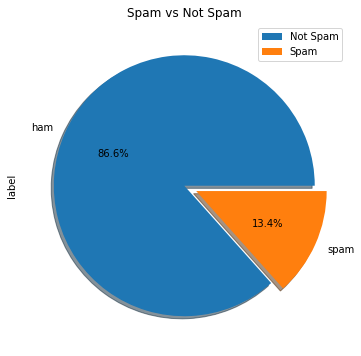

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c24c3350>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

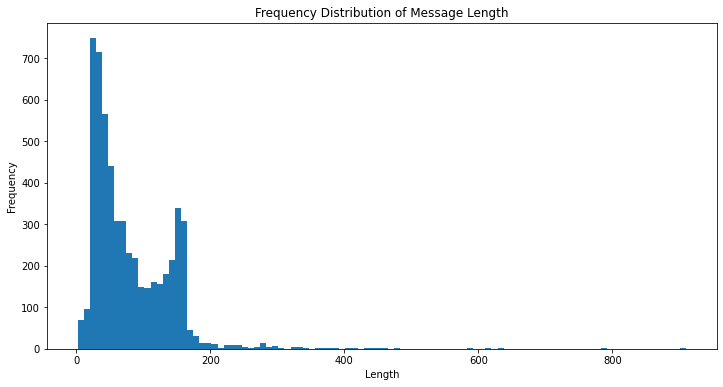

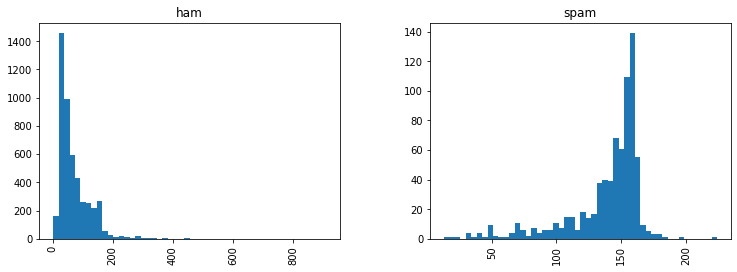

In [12]:
messages.describe()
#use groupby to use describe by label, this way we can begin to think about the features that separate ham and spam!

messages.groupby('label').describe().T

messages['length'] = messages['message'].apply(len)
messages.head()


# Count the frequency of top 5 messages.
messages['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

messages["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Not Spam")
plt.legend(["Not Spam", "Spam"])
plt.show()
fig = plt.figure()
fig.savefig('plot.png')

plt.figure(figsize=(12,6))
messages['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")


messages['length'].describe()

 #Using Masking To Find the the message having length Of 910 words
 
messages[messages['length'] == 910]['message'].iloc[0]


messages.hist(column='length', by='label', bins=50,figsize=(12,4))



In [ ]:
nltk.download('stopwords')

In [15]:

def text_preprocess(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    return nostop

spam_messages = messages[messages["label"] == "spam"]["message"]
ham_messages = messages[messages["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of Non spam messages : ",len(ham_messages))
#Wordcloud for Spam Messages¶
# This may take a while....
spam_words = text_preprocess(spam_messages)

# lets print some spam words
spam_words[:10]

No of spam messages :  747
No of Non spam messages :  4825


['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

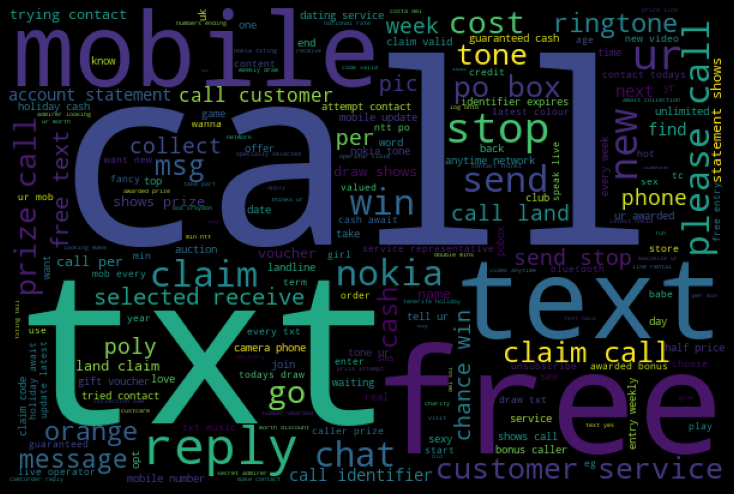

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
reply      98
u          98
stop       78
dtype: int64


In [16]:
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))



#Wordcloud for Non Spam Messages

ham_words = text_preprocess(ham_messages)

In [17]:
#print some Non Spam words

ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

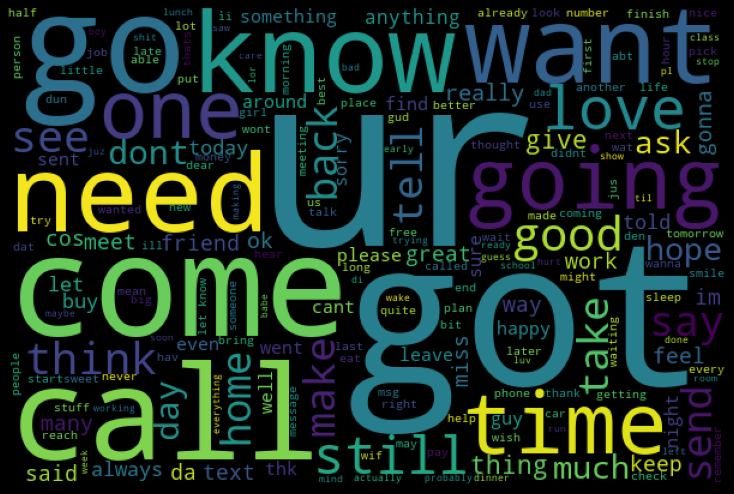

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:

ham_wordcloud = WordCloud(width=600, height=400).generate(' '.join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


messages.head()

In [19]:
# remove punctuations/ stopwords from all SMS 
messages["message"] = messages["message"].apply(text_preprocess)

In [20]:
# Conver the SMS into string from list
messages["message"] = messages["message"].agg(lambda x: ' '.join(map(str, x)))

messages["message"][7]

'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune'

In [21]:
# Creating the Bag of Words


vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(messages['message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names()[20:40])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))



message4 = messages['message'][3]
print(message4)

20 Bag of Words (BOW) Features: 

['absence', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation']

Total number of vocab words :  8084
u dun say early hor u c already say


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)



messages_bow = bow_transformer.transform(messages['message'])


print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


  (0, 207)	1
  (0, 1981)	1
  (0, 2000)	1
  (0, 3141)	1
  (0, 5945)	2
(1, 8084)
Shape of Sparse Matrix:  (5572, 8084)
Amount of Non-Zero occurences:  44211


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)


tfidf4 = tfidf_transformer.transform(bow4)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)


(5572, 8084)


In [24]:
#Lets convert our clean text into a representation that a machine learning model can understand. I'll use the Tfifd for this



from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["message"])
print(features.shape)

print(len(vec.vocabulary_))

msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)


print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

(5572, 7927)
7927
train dataset features size :  (4457, 8084)
train dataset label size (4457,)


test dataset features size (1115, 8084)
test dataset lable size (1115,)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)


predict_train = spam_detect_model.predict(msg_train)


print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))



print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages['label'][3])


Classification Report 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3856
        spam       1.00      0.82      0.90       601

    accuracy                           0.98      4457
   macro avg       0.99      0.91      0.94      4457
weighted avg       0.98      0.98      0.97      4457



Confusion Matrix 
 [[3856    0]
 [ 109  492]]


Accuracy of Train dataset : 0.976
predicted: ham
expected: ham


In [26]:
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       969
        spam       1.00      0.69      0.82       146

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

[[969   0]
 [ 45 101]]


In [27]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))


Accuracy of the model : 0.960


In [28]:
#Applying second calssification model
#Classification through Support Vector Machine SVM

from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split( messages_tfidf, messages['label'], test_size=0.2, random_state=0)

classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))


0.9659192825112107


In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)
from yellowbrick.classifier import ClassificationReport
classes = ["Spam", "Not Spam"]

classifier = ClassificationReport(spam_detect_model,classes=classes, support=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#Classification by logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9497757847533632
